In [1]:
pip install astropy

Note: you may need to restart the kernel to use updated packages.


In [13]:
import astropy.constants as const
from astropy.modeling import models, fitting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

print('import complete')


C:\Users\jnath


In [14]:
print(os.getcwd())
%cd astro
print(os.getcwd())

C:\Users\jnath
C:\Users\jnath\astro
C:\Users\jnath\astro


In [24]:
# planet data
planets = pd.read_csv('planets.csv',skiprows=359, sep=',')

planets.head()


d:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (247) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,rowid,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,...,st_bmy,st_bmyerr,st_bmylim,st_m1,st_m1err,st_m1lim,st_c1,st_c1err,st_c1lim,st_colorn
0,1,11 Com,b,11 Com b,Radial Velocity,0,1,326.03000,0.32,-0.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,2,11 UMi,b,11 UMi b,Radial Velocity,0,1,516.21997,3.20,-3.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,3,14 And,b,14 And b,Radial Velocity,0,1,185.84000,0.23,-0.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,4,14 Her,b,14 Her b,Radial Velocity,0,1,1773.40002,2.50,-2.50,...,0.537,0.001,0.0,0.366,0.002,0.0,0.438,0.006,0.0,9
4,5,16 Cyg B,b,16 Cyg B b,Radial Velocity,0,1,798.50000,1.00,-1.00,...,0.418,0.003,0.0,0.222,0.003,0.0,0.351,0.003,0.0,17


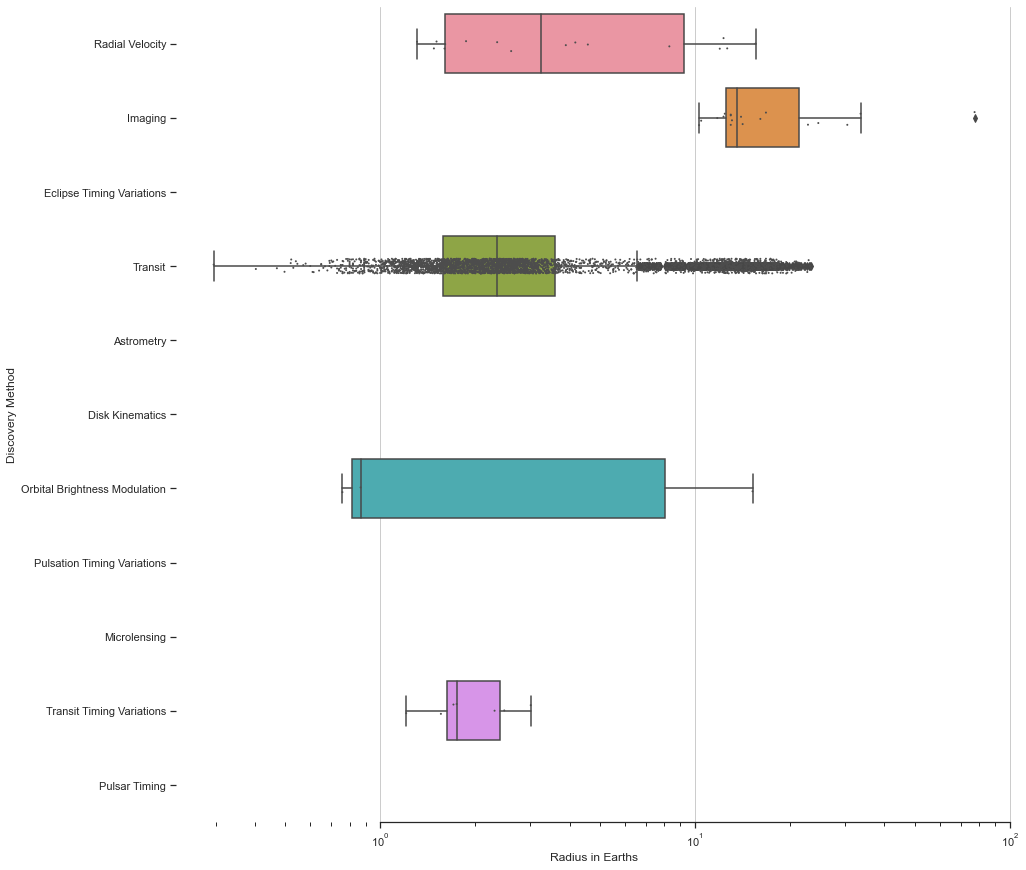

In [51]:

xy_dict = {
    'source': planets,
    'x': 'pl_rade',
    'x_label': 'Radius in Earths',
    'y': 'pl_discmethod',
    'y_label': 'Discovery Method',
    'scale': 'log'
}

def sea_plot(xy_dict):
    sns.set_theme(style="ticks")

    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(figsize=(15, 15))
    ax.set_xscale(xy_dict['scale'])

    # Plot the orbital period with horizontal boxes
    sns.boxplot(x=xy_dict['x'], y=xy_dict['y'], data=xy_dict['source'])

    # Add in points to show each observation
    sns.stripplot(x=xy_dict['x'], y=xy_dict['y'], data=xy_dict['source'],
                  size=2, color=".3", linewidth=0)

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.set(ylabel=xy_dict['y_label'], xlabel=xy_dict['x_label'])
    sns.despine(trim=True, left=True)
    
sea_plot(xy_dict)